In [ ]:
# This Notebook is based on the work of Prof. Christoph Würsch during the MachLe Course. Please do not distribute.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D,Activation, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__) #version should be at least 1.15.x

2.10.0


In [2]:
# load and split data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((len(train_images),28,28))
test_images = test_images.reshape((len(test_images),28,28))

# names of class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
print("shape for training (x) data : ", train_images.shape) # should be: 60'000 Images with 28x28 pixels
print("shape for training (y) data : ", train_labels.shape)  # 60'000 Labels with 10 classes
print("shape for test (x) data     : ", test_images.shape)  # 10'000 Images with 28x28 pixels
print("shape for test (y) data     : ", test_labels.shape)  # 10'000 Labels with 10 classes

shape for training (x) data :  (60000, 28, 28)
shape for training (y) data :  (60000,)
shape for test (x) data     :  (10000, 28, 28)
shape for test (y) data     :  (10000,)


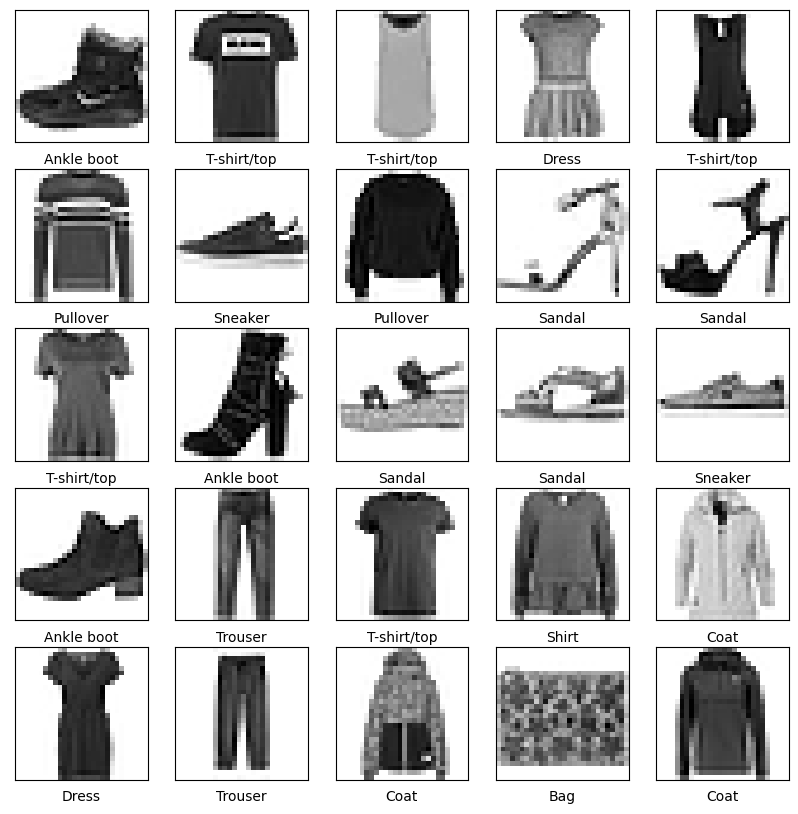

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
## Start CNN

model = Sequential()

train_images=train_images.reshape(60000,28,28,1)
test_images=test_images.reshape(10000,28,28,1)

model.add(Conv2D(filters = 32,kernel_size=(3,3), strides =1, padding='same', input_shape= (28,28,1), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 64,kernel_size=(4,4), strides =1, padding='same',activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(filters = 128,kernel_size=(5,5), strides =1, padding='same',activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

## Output Layer -> 10 classes
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       2

Epoch 1/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.5240 - accuracy: 0.8087 - val_loss: 0.3362 - val_accuracy: 0.8808
Epoch 2/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.3483 - accuracy: 0.8699 - val_loss: 0.3157 - val_accuracy: 0.8882
Epoch 3/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.3108 - accuracy: 0.8852 - val_loss: 0.2781 - val_accuracy: 0.9007
Epoch 4/10
1875/1875 [==============================] - 107s 57ms/step - loss: 0.2861 - accuracy: 0.8937 - val_loss: 0.2643 - val_accuracy: 0.9032
Epoch 5/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.2686 - accuracy: 0.9005 - val_loss: 0.2454 - val_accuracy: 0.9091
Epoch 6/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.2589 - accuracy: 0.9038 - val_loss: 0.2474 - val_accuracy: 0.9108
Epoch 7/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.2475 - accuracy: 0.9079 - val_loss: 0.

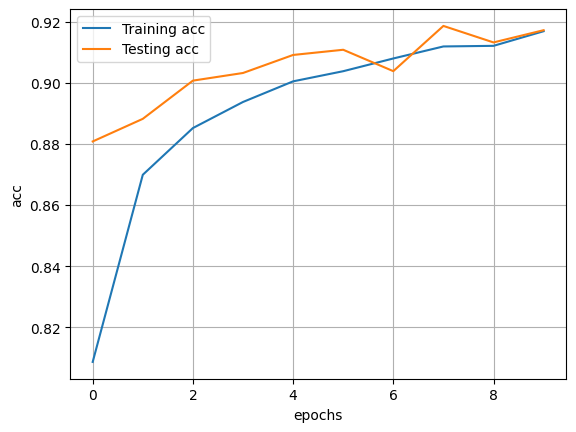

In [6]:

model.compile(optimizer = 'adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

log = model.fit(train_images, 
                train_labels, 
                epochs = 10,
                validation_data = (test_images, test_labels))

# make predictions for test data
predictions = model.predict(test_images)

# plot accuracy per epoch
plt.plot(log.history['accuracy'], label='Training acc')
plt.plot(log.history['val_accuracy'], label='Testing acc')
plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend()
plt.grid()


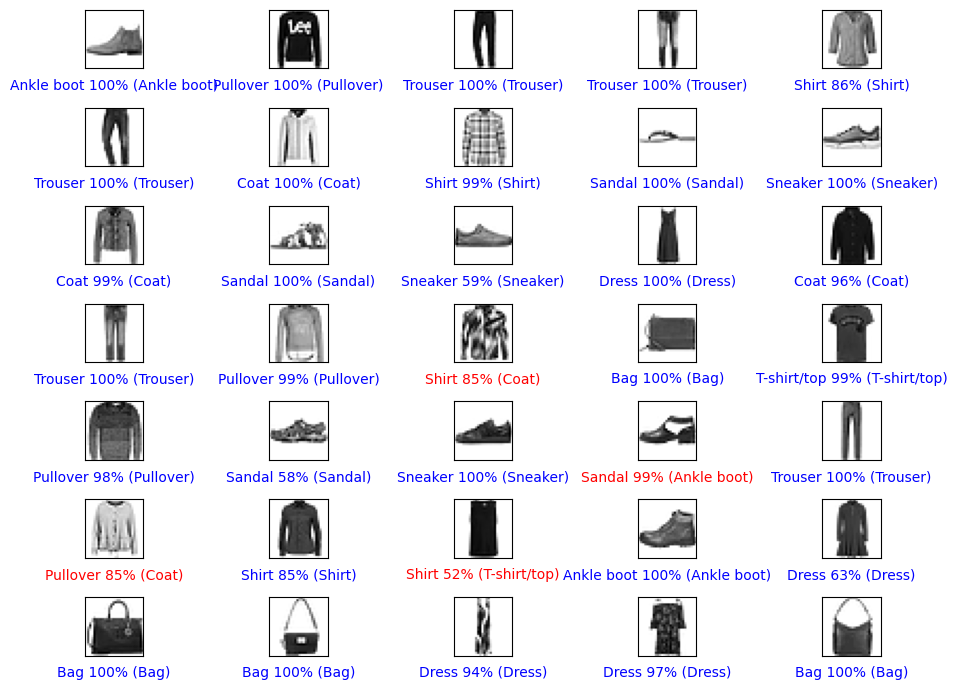

In [7]:
test_images=test_images.reshape(10000,28,28)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# plot prediction and image
num_rows = 7
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 1*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()